In [3]:
import os
import pandas as pd  # 데이터 분석
import numpy as np    # 수치 계산
import matplotlib.pyplot as plt  # 시각화
from skimage import io  # 이미지 읽기/쓰기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from matplotlib import colormaps

In [4]:
# 시간 및 주파수 정보
time = np.load('./data/time.npy')
freq = np.load('./data/freq.npy')

print("Time shape:", time.shape)
print("Freq shape:", freq.shape)

# 학습 데이터 (day 1~4)
X_train = np.load('./data/X_train_mouse02.npy')
Y_train = np.load('./data/Y_train_mouse02.npy')

# 테스트 데이터 (day 5)
X_test = np.load('./data/X_test_mouse02.npy')
Y_test = np.load('./data/Y_test_mouse02.npy')

# 데이터 구조 확인
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

Time shape: (13,)
Freq shape: (176,)
X_train shape: (22992, 13, 176)
Y_train shape: (22992,)
X_test shape: (5748, 13, 176)
Y_test shape: (5748,)


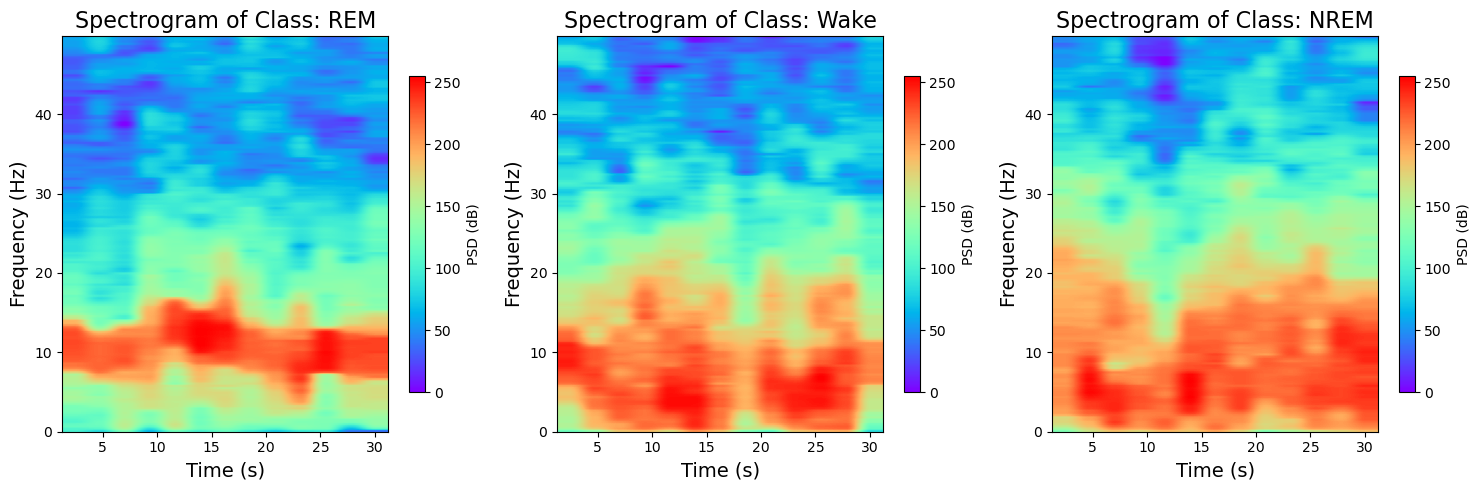

In [5]:
# 클래스 이름 정의
classes = ['REM', 'Wake', 'NREM']
spectro_of_3_classes = [[] for _ in range(3)]
encountered_labels = set()

# 각 클래스의 예시 스펙트로그램 선택
for i, label in enumerate(Y_test.flatten()):
    if label in [0, 1, 2] and label not in encountered_labels:
        spectro_of_3_classes[label] = X_test[i]
        encountered_labels.add(label)
    if len(encountered_labels) == 3:
        break

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=False, sharey=False)

for i in range(3):
    spectro = np.transpose(spectro_of_3_classes[i])
    im = axes[i].imshow(spectro, aspect='auto', origin='lower', 
                        extent=[time[0], time[-1], freq[0], freq[-1]])
    fig.colorbar(im, ax=axes[i], label='PSD (dB)', shrink=0.8)
    im.set_cmap(colormaps.get_cmap('rainbow'))
    axes[i].set_xlabel("Time (s)", fontsize=14)
    axes[i].set_ylabel("Frequency (Hz)", fontsize=14)
    axes[i].set_title(f"Spectrogram of Class: {classes[i]}", fontsize=16)

plt.tight_layout()
plt.show()

In [6]:
# 3차원 데이터를 2차원으로 변환 (flatten)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [7]:
# 결정 트리 모델 생성 및 학습
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# 예측
Y_pred = clf.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 분류 리포트
print("Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=['REM', 'Wake', 'NREM']))

# 혼동 행렬
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

         REM       0.66      0.72      0.69       620
        Wake       0.76      0.73      0.74      1791
        NREM       0.90      0.91      0.91      3337

    accuracy                           0.83      5748
   macro avg       0.77      0.78      0.78      5748
weighted avg       0.83      0.83      0.83      5748

Confusion Matrix:
[[ 446  145   29]
 [ 195 1299  297]
 [  35  272 3030]]
